### 1.Data collection and Preparation
    Collect the dataset
    Data Preparation
    Exploratory Data Analysis
### 2. Descriptive Statistics
    Visual Analysis
### 3. Model Building
    Training the model in multiple algorithms
    Testing the model
### 4. Performance Testing
    Testing model with multiple evaluation metrics
### 5. Model Deployment
    Save the best model
    Integrate with Web Framework

In [158]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


## 1.Collect the Dataset

Importing the libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import pickle
from scipy import stats

In [14]:
import warnings 
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv("C:\Internship\self\Airline_Reviews.csv")

In [16]:
data.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [17]:
data.sample()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
2921,2921,Air Tahiti Nui,7,"""the airline did its job""",11th January 2016,False,"The A340 was Nuku Hiva, the youngest of the Ai...",A340-300,Couple Leisure,Business Class,PPT to LAX,December 2015,4.0,4.0,4.0,4.0,NaN,NaN,4.0,yes


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [19]:
data.describe()

,Unnamed: 0,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
count,23171.00000,19016.000000,18911.000000,14500.000000,18378.000000,10829.000000,5920.000000,22105.000000
mean,11585.00000,2.618321,2.871609,2.553586,2.353738,2.178964,1.780405,2.451120
std,6689.03588,1.464844,1.604631,1.526314,1.595747,1.488758,1.318800,1.594125
min,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5792.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,11585.00000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,17377.50000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
max,23170.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [20]:
data.shape

(23171, 20)

## 2. Data Preparation--Handling missing values

In [21]:
data.isnull().any()

Unnamed: 0                False
Airline Name              False
Overall_Rating            False
Review_Title              False
Review Date               False
Verified                  False
Review                    False
Aircraft                   True
Type Of Traveller          True
Seat Type                  True
Route                      True
Date Flown                 True
Seat Comfort               True
Cabin Staff Service        True
Food & Beverages           True
Ground Service             True
Inflight Entertainment     True
Wifi & Connectivity        True
Value For Money            True
Recommended               False
dtype: bool

In [22]:
data.isnull().sum()

Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64

In [23]:
new_data = data.drop(['Inflight Entertainment','Wifi & Connectivity','Aircraft','Value For Money',
                      'Cabin Staff Service','Unnamed: 0','Review_Title','Review Date','Review'],axis=1)

In [24]:
new_data['Overall_Rating'].value_counts()

1    11595
2     2296
9     1768
8     1757
3     1356
7     1192
4      859
n      842
5      830
6      676
Name: Overall_Rating, dtype: int64

In [25]:
new_data['Overall_Rating'] = new_data['Overall_Rating'].replace(['1','2','3','4','5','6','7','8','9','n'],['1','2','3','4','5','6','7','8','9','10'])

In [26]:
new_data['Overall_Rating'].value_counts()

1     11595
2      2296
9      1768
8      1757
3      1356
7      1192
4       859
10      842
5       830
6       676
Name: Overall_Rating, dtype: int64

In [27]:
new_data.isnull().sum()

Airline Name            0
Overall_Rating          0
Verified                0
Type Of Traveller    3738
Seat Type            1096
Route                3828
Date Flown           3754
Seat Comfort         4155
Food & Beverages     8671
Ground Service       4793
Recommended             0
dtype: int64

In [174]:
# filling null values with median and mode depending on the values(Median for numerical and mode for categorical)

In [28]:
new_data['Type Of Traveller'] = new_data['Type Of Traveller'].fillna(new_data['Type Of Traveller'].mode()[0])
new_data['Seat Type'] = new_data['Seat Type'].fillna(new_data['Seat Type'].mode()[0])
new_data['Route'] = new_data['Route'].fillna(new_data['Route'].mode()[0])
new_data['Date Flown'] = new_data['Date Flown'].fillna(new_data['Date Flown'].mode()[0])
new_data['Seat Comfort'] = new_data['Seat Comfort'].fillna(new_data['Seat Comfort'].mode()[0])
new_data['Food & Beverages'] = new_data['Food & Beverages'].fillna(new_data['Food & Beverages'].mode()[0])
new_data['Ground Service'] = new_data['Ground Service'].fillna(new_data['Ground Service'].mode()[0])

For the above columns we are using mode instead of median even though numeric values are present,because the column consists of categories(0 to 5).

In [29]:
new_data.isnull().sum()

Airline Name         0
Overall_Rating       0
Verified             0
Type Of Traveller    0
Seat Type            0
Route                0
Date Flown           0
Seat Comfort         0
Food & Beverages     0
Ground Service       0
Recommended          0
dtype: int64

In [30]:
new_data[['Month Flown','Year Flown']] = new_data['Date Flown'].str.split(expand=True)

Route column has 3 values i.e.. Place A to Place B via Place C,so inorder to chose we gave indices for Sofia as 0 and Amsterdam  as 1 and then run the split function again to split 'via'.

In [31]:
new_data['Origin'] = new_data.Route.str.split(' to ',expand=True)[0]
new_data['Destination'] = new_data.Route.str.split(' to ',expand=True)[1]

new_data['Destination'] = new_data.Destination.str.split(' via ',expand=True)[0]

In [32]:
del new_data['Route']
del new_data['Date Flown']

In [34]:
new_data['Origin'] = new_data['Origin'].replace(['Tel Avivito Malta (MLA)','Bangalore toChennai','JFK toTLV via Baku','Krabi toBangkok','Hong Kong To Shanghai', 
                                      'Edinburgh To Fuerteventura','Nuremburg toHamburg','Mumbai toJaipur','Sydney to- New York via Soul', 
                                      'London Gatwick - Bangkok','SIN toi MFM','Jakartato Yogyakarta','Cardiff-Malta return','KIV-LIS',
                                      'GRR-ORD','LCY-FRA','NAP-RMF return','LEB-BOS','Bucharest-Brussels','Da Nang - Hong Kong','New-York',
                                      'LHR-DXB','Dublin - Charlotte','Kansas City via Dallas Ft Worth','Sydney via Singapore', 
                                      'Geneva via Brussels','Nursultan via Dubai','Denpasar Medan via Jakarta',
                                      'Auckland Denpasar via Sydney / Melbourne','Lima via Santiago','Manila via Los Angeles', 
                                      'Dar es Salaam via Kigali','Singapore via Sydney','Grand Rapidsvto Orlando via Chicago', 
                                      'Toronto via Varadero', 'Bangkok via Mumbai','A Coruna via Bilbao','LHR-DXB', 
                                       'Paris Orly Los Angeles','Newark Los Angeles','Honolulu Seattle','San {Paulo'],
                                      ['Tel Aviv(MLA)','Bangalore','JFK','Krabi','Hong Kong','Edinburgh','Nuremburg','Mumbai', 
                                       'Sydney','London Gatwick','SIN','Jakarta','Cardiff','KIV','GRR','LCY','NAP','LEB','Bucharest', 
                                       'Da Nang', 'New York', 'LHR', 'Dublin', 'Kansas City','Sydney','Geneva','Nursultan','Denpasar Medan', 
                                       'Auckland Denpasar','Lima','Manila', 'Dar es Salaam', 'Singapore', 'Grand Rapidsvto Orlando',
                                       'Toronto','Bangkok','A Coruna','LHR','Paris Orly','Newark','Honolulu','San Paulo'])

In [35]:
new_data['Origin']

0           Moroni
1           Moroni
2          Anjouan
3        Frankfurt
4            Sofia
           ...    
23166      Bangkok
23167    Singapore
23168      Bangkok
23169        Tokyo
23170    Singapore
Name: Origin, Length: 23171, dtype: object

In [36]:
new_data['Destination']

0             Moheli
1            Anjouan
2           Dzaoudzi
3           Pristina
4          Amsterdam
            ...     
23166          Tokyo
23167          Tokyo
23168          Tokyo
23169    Los Angeles
23170          Tokyo
Name: Destination, Length: 23171, dtype: object

In [37]:
new_data.shape

(23171, 13)

In [38]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline Name       23171 non-null  object 
 1   Overall_Rating     23171 non-null  object 
 2   Verified           23171 non-null  bool   
 3   Type Of Traveller  23171 non-null  object 
 4   Seat Type          23171 non-null  object 
 5   Seat Comfort       23171 non-null  float64
 6   Food & Beverages   23171 non-null  float64
 7   Ground Service     23171 non-null  float64
 8   Recommended        23171 non-null  object 
 9   Month Flown        23171 non-null  object 
 10  Year Flown         23171 non-null  object 
 11  Origin             23171 non-null  object 
 12  Destination        23133 non-null  object 
dtypes: bool(1), float64(3), object(9)
memory usage: 2.1+ MB


In [39]:
new_data.isnull().sum()

Airline Name          0
Overall_Rating        0
Verified              0
Type Of Traveller     0
Seat Type             0
Seat Comfort          0
Food & Beverages      0
Ground Service        0
Recommended           0
Month Flown           0
Year Flown            0
Origin                0
Destination          38
dtype: int64

In [40]:
j=0
row_num = [2172,3788,5112,5368,7000,8314,9107,10589,12993,17759,20572,
           20930,2225,2380,4339,5182,5785,6382,10991,12573,17051,21497,
          4293,6215,9787,10207,12372,13556,16022,17217,17732,18774,
          19462,20112,22449,11584,10001,12258,10886]
new_des = ['Malta','Chennai','TLV','Bangkok','Shanghai','Fuerteventura','Hamburg',
          'Jaipur','New York','Bangkok','MFM','Yogyakarta','Malta','LIS','ORD','FRA',
          'RMF','BOS','Brussels','Hong Kong','DXB','Charlotte','Dallas Ft Worth',
           'Brussels','Dubai','Jakarta','Sydney / Melborne','Santiago','Los Angeles','Kigali',
          'Sydney','Chicago','Varadero','Mumbai','Bilbao','Dallas','Los Angeles','Los Angeles','Seattle ']
for i in row_num:
    new_data.at[i,'Destination'] = new_des[j]
    j+=1

In [41]:
new_data.isnull().sum()

Airline Name         0
Overall_Rating       0
Verified             0
Type Of Traveller    0
Seat Type            0
Seat Comfort         0
Food & Beverages     0
Ground Service       0
Recommended          0
Month Flown          0
Year Flown           0
Origin               0
Destination          0
dtype: int64

In [43]:
new_order = ['Airline Name','Seat Type','Type Of Traveller','Origin',
             'Destination','Month Flown','Year Flown','Verified','Seat Comfort',
             'Food & Beverages','Ground Service','Overall_Rating','Recommended']

In [44]:
# Reordering the columns of given data to our desired manner
ndata = new_data.reindex(columns=new_order)

In [45]:
ndata.head()

,Airline Name,Seat Type,Type Of Traveller,Origin,Destination,Month Flown,Year Flown,Verified,Seat Comfort,Food & Beverages,Ground Service,Overall_Rating,Recommended
0,AB Aviation,Economy Class,Solo Leisure,Moroni,Moheli,November,2019,True,4.0,4.0,4.0,9,yes
1,AB Aviation,Economy Class,Solo Leisure,Moroni,Anjouan,June,2019,True,2.0,1.0,1.0,1,no
2,AB Aviation,Economy Class,Solo Leisure,Anjouan,Dzaoudzi,June,2019,True,2.0,1.0,1.0,1,no
3,Adria Airways,Economy Class,Solo Leisure,Frankfurt,Pristina,September,2019,False,1.0,1.0,1.0,1,no
4,Adria Airways,Economy Class,Couple Leisure,Sofia,Amsterdam,September,2019,True,1.0,1.0,1.0,1,no


In [46]:
ndata['Origin'].unique()

array(['Moroni', 'Anjouan', 'Frankfurt', ..., 'BWA', 'Seuol', 'Narita '],
      dtype=object)

In [47]:
ndata['Origin'].nunique()

2171

In [48]:
ndata.head()

,Airline Name,Seat Type,Type Of Traveller,Origin,Destination,Month Flown,Year Flown,Verified,Seat Comfort,Food & Beverages,Ground Service,Overall_Rating,Recommended
0,AB Aviation,Economy Class,Solo Leisure,Moroni,Moheli,November,2019,True,4.0,4.0,4.0,9,yes
1,AB Aviation,Economy Class,Solo Leisure,Moroni,Anjouan,June,2019,True,2.0,1.0,1.0,1,no
2,AB Aviation,Economy Class,Solo Leisure,Anjouan,Dzaoudzi,June,2019,True,2.0,1.0,1.0,1,no
3,Adria Airways,Economy Class,Solo Leisure,Frankfurt,Pristina,September,2019,False,1.0,1.0,1.0,1,no
4,Adria Airways,Economy Class,Couple Leisure,Sofia,Amsterdam,September,2019,True,1.0,1.0,1.0,1,no


In [49]:
ndata['Year Flown']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
23166    2022
23167    2022
23168    2022
23169    2022
23170    2022
Name: Year Flown, Length: 23171, dtype: object

## 3. Exploratory Data Analysis

Descriptive statistical

Visual Analysis
1) Univariate Analysis

2) Bivariate Analysis

3) Multivariate analysis

[Text(0.5, 0, 'index')]

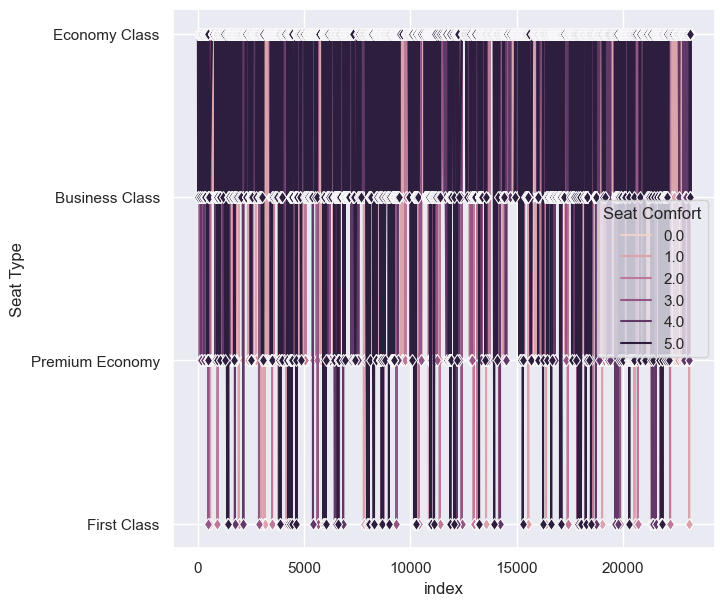

In [50]:
#Univariate analysis
##lineplot in seaborn
sns.set(rc={'figure.figsize':[7,7]})
sns.set(font_scale=1)
fig = sns.lineplot(x=ndata.index,y=ndata['Seat Type'],markevery=1,marker='d',
                  hue=ndata['Seat Comfort'])
fig.set(xlabel='index')

In [51]:
ndata['Seat Type'].value_counts()

Economy Class      20241
Business Class      2098
Premium Economy      646
First Class          186
Name: Seat Type, dtype: int64

<AxesSubplot:>

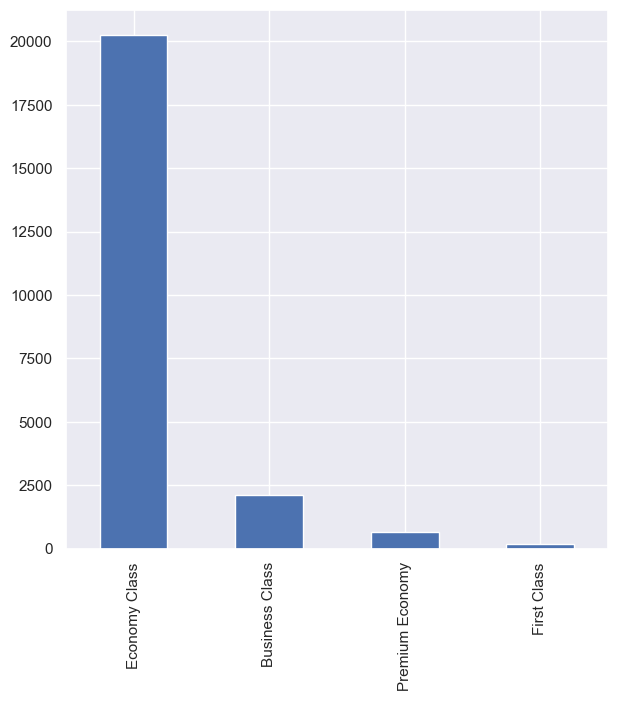

In [52]:
ndata['Seat Type'].value_counts().plot.bar()

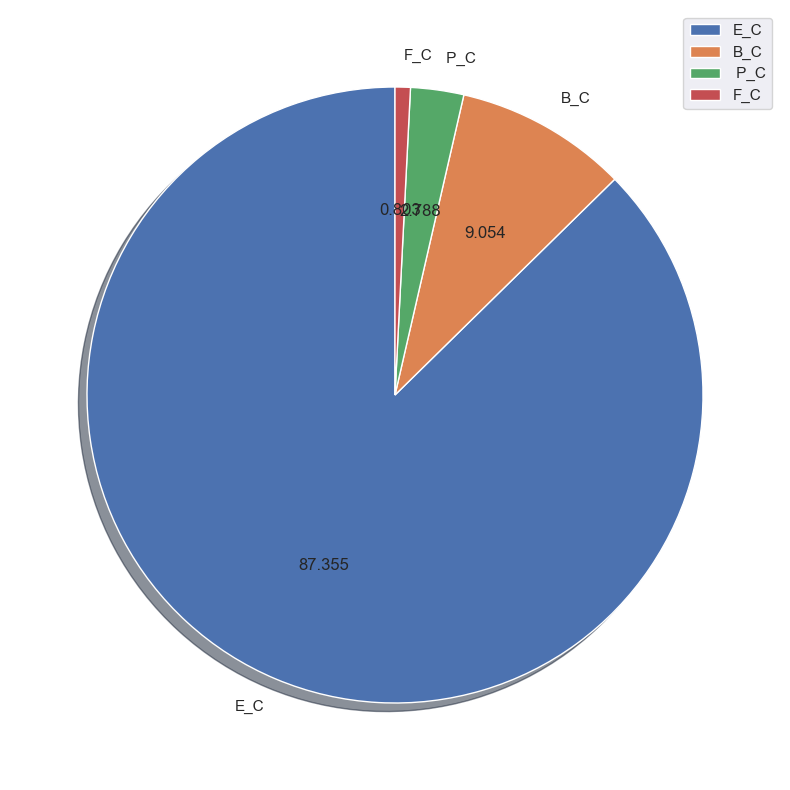

In [53]:
plt.figure(figsize=(10,10))
labels = ['E_C','B_C',' P_C','F_C']
plt.pie(ndata['Seat Type'].value_counts(),startangle=90,autopct='%.3f',
       labels=labels,shadow=True)
plt.legend(labels,loc='best')
#plt.axis('equal')
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ndata['Overall_Rating'] = le.fit_transform(ndata['Overall_Rating'])

<AxesSubplot:xlabel='Type Of Traveller', ylabel='Overall_Rating'>

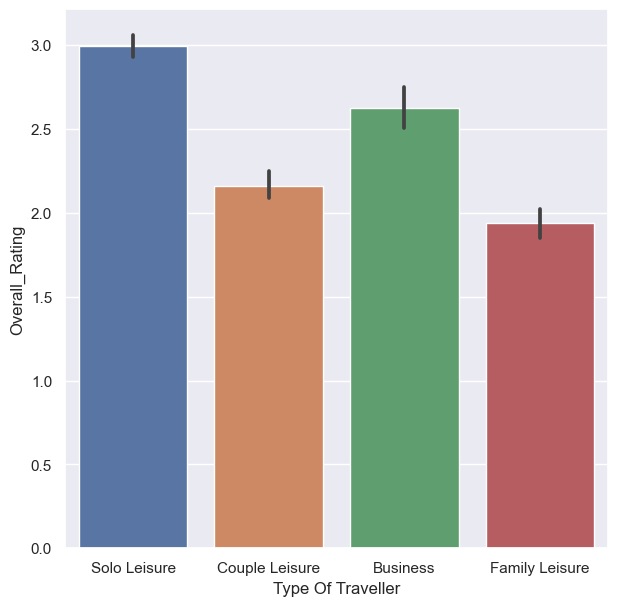

In [55]:
#Bivariate analysis
sns.barplot(data=ndata,x='Type Of Traveller',y='Overall_Rating')

<AxesSubplot:>

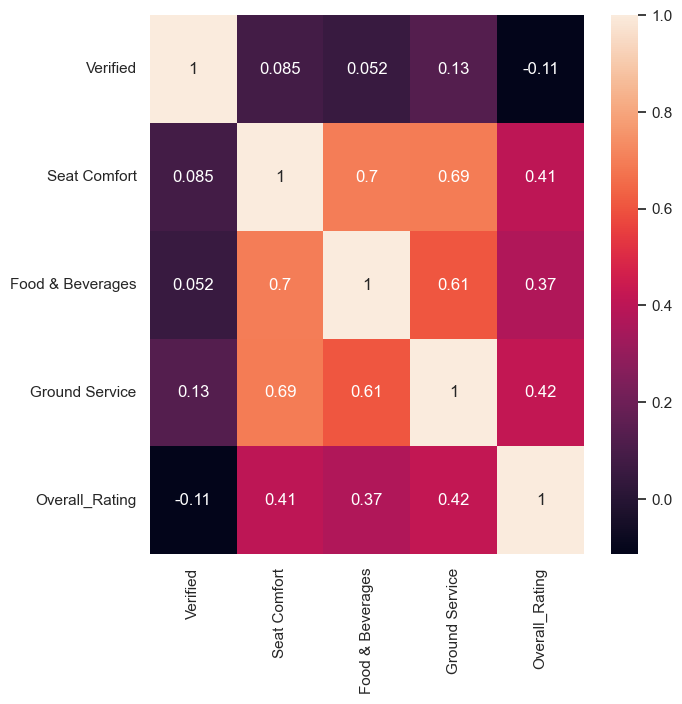

In [56]:
#multivariate analysis
sns.heatmap(ndata.corr(),annot=True)

## 4. Handling Categorical Values

In [57]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline Name       23171 non-null  object 
 1   Seat Type          23171 non-null  object 
 2   Type Of Traveller  23171 non-null  object 
 3   Origin             23171 non-null  object 
 4   Destination        23171 non-null  object 
 5   Month Flown        23171 non-null  object 
 6   Year Flown         23171 non-null  object 
 7   Verified           23171 non-null  bool   
 8   Seat Comfort       23171 non-null  float64
 9   Food & Beverages   23171 non-null  float64
 10  Ground Service     23171 non-null  float64
 11  Overall_Rating     23171 non-null  int32  
 12  Recommended        23171 non-null  object 
dtypes: bool(1), float64(3), int32(1), object(8)
memory usage: 2.1+ MB


In [58]:
ndata.head()

,Airline Name,Seat Type,Type Of Traveller,Origin,Destination,Month Flown,Year Flown,Verified,Seat Comfort,Food & Beverages,Ground Service,Overall_Rating,Recommended
0,AB Aviation,Economy Class,Solo Leisure,Moroni,Moheli,November,2019,True,4.0,4.0,4.0,9,yes
1,AB Aviation,Economy Class,Solo Leisure,Moroni,Anjouan,June,2019,True,2.0,1.0,1.0,0,no
2,AB Aviation,Economy Class,Solo Leisure,Anjouan,Dzaoudzi,June,2019,True,2.0,1.0,1.0,0,no
3,Adria Airways,Economy Class,Solo Leisure,Frankfurt,Pristina,September,2019,False,1.0,1.0,1.0,0,no
4,Adria Airways,Economy Class,Couple Leisure,Sofia,Amsterdam,September,2019,True,1.0,1.0,1.0,0,no


In [59]:
ndata["Destination"]

0             Moheli
1            Anjouan
2           Dzaoudzi
3           Pristina
4          Amsterdam
            ...     
23166          Tokyo
23167          Tokyo
23168          Tokyo
23169    Los Angeles
23170          Tokyo
Name: Destination, Length: 23171, dtype: object

As we can see our dataset has categorical data,we must convert the categorical data,we must convert the categorical data to integer encoding or binary encoding.
To convert,we use encoding techniques.

In this dataset,categorical features are Airline Name, Seat Type, Type Of Traveller, Origin,Destination, Month Flown, Year Flown, Verified, Overall_Rating, Recommended.

In [60]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()
le9 = LabelEncoder()
le10 = LabelEncoder()

In [61]:
ndata['Airline Name'] = le1.fit_transform(ndata['Airline Name'])
ndata['Seat Type'] = le2.fit_transform(ndata['Seat Type'])
ndata['Type Of Traveller'] = le3.fit_transform(ndata['Type Of Traveller'])
ndata['Origin'] = le4.fit_transform(ndata['Origin'])
ndata['Destination'] = le5.fit_transform(ndata['Destination'])
ndata['Month Flown'] = le6.fit_transform(ndata['Month Flown'])
ndata['Year Flown'] = le7.fit_transform(ndata['Year Flown'])
ndata['Verified'] = le8.fit_transform(ndata['Verified'])
ndata['Overall_Rating'] = le9.fit_transform(ndata['Overall_Rating'])
ndata['Recommended'] = le10.fit_transform(ndata['Recommended'])

In [62]:
ndata.head()

,Airline Name,Seat Type,Type Of Traveller,Origin,Destination,Month Flown,Year Flown,Verified,Seat Comfort,Food & Beverages,Ground Service,Overall_Rating,Recommended
0,0,1,3,1274,1545,9,6,1,4.0,4.0,4.0,9,1
1,0,1,3,1274,107,6,6,1,2.0,1.0,1.0,0,0
2,0,1,3,79,672,6,6,1,2.0,1.0,1.0,0,0
3,4,1,3,629,1927,11,6,0,1.0,1.0,1.0,0,0
4,4,1,1,1830,99,11,6,1,1.0,1.0,1.0,0,0


In [63]:
ndata.describe()

,Airline Name,Seat Type,Type Of Traveller,Origin,Destination,Month Flown,Year Flown,Verified,Seat Comfort,Food & Beverages,Ground Service,Overall_Rating,Recommended
count,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000
mean,245.027880,0.973242,2.008675,1073.719089,1451.342066,5.495188,7.705321,0.531785,2.328126,1.972207,2.073713,2.565966,0.336930
std,144.313766,0.457584,1.077595,558.349459,800.585081,3.019861,2.512480,0.498999,1.465062,1.422340,1.523264,3.235551,0.472671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,124.000000,1.000000,1.000000,616.000000,724.500000,3.000000,6.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,237.000000,1.000000,2.000000,1224.000000,1494.000000,6.000000,9.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
75%,373.000000,1.000000,3.000000,1399.000000,2343.000000,7.000000,10.000000,1.000000,4.000000,3.000000,3.000000,5.000000,1.000000
max,496.000000,3.000000,3.000000,2170.000000,2691.000000,11.000000,10.000000,1.000000,5.000000,5.000000,5.000000,9.000000,1.000000


## 5.Model Building
1) Splitting dependent and independent variable

2) Check if data is imbalanced

3) Splitting data into training and testing

4) Training the model in multiple algorithms

5) Testing the model

Splitting dependent and independent variable

In [64]:
ndata.shape

(23171, 13)

In [65]:
x=ndata.iloc[:,0:12].values
y=ndata.iloc[:,12:13].values

In [66]:
x

array([[  0.,   1.,   3., ...,   4.,   4.,   9.],
       [  0.,   1.,   3., ...,   1.,   1.,   0.],
       [  0.,   1.,   3., ...,   1.,   1.,   0.],
       ...,
       [487.,   1.,   0., ...,   2.,   1.,   3.],
       [487.,   0.,   0., ...,   3.,   1.,   6.],
       [487.,   1.,   3., ...,   1.,   1.,   0.]])

In [67]:
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

Basically, in target variable some values repeat more 
often than the other kind of values. To remove that 
imbalanced data, we will use SMOTE(Synthetic Minority 
Over Sampling Technique). 

In [68]:
ndata.Recommended.value_counts()

0    15364
1     7807
Name: Recommended, dtype: int64

In [69]:
ndata["Origin"]

0        1274
1        1274
2          79
3         629
4        1830
         ... 
23166     187
23167    1819
23168     187
23169    1971
23170    1819
Name: Origin, Length: 23171, dtype: int32

In [70]:
#as the values are oversampling we need to use smote technique
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto',random_state=1)

In [71]:
x,y=smote.fit_resample(x,y)

In [72]:
np.count_nonzero(y==1)

15364

In [73]:
np.count_nonzero(y==0)

15364

In [74]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [130]:
x_train

array([[ 0.74796505,  0.08392531, -0.99411421, ...,  0.48408431,
         0.95942464,  0.49680964],
       [ 0.95757826,  1.93307645,  0.60257494, ...,  1.80798311,
         0.95942464, -0.95362688],
       [-0.60054658,  0.08392531,  0.92417925, ...,  1.14603371,
        -0.87372769, -0.95362688],
       ...,
       [-0.03459092,  0.08392531, -0.99411421, ...,  1.14603371,
         1.57047542, -0.95362688],
       [-1.66957394,  0.08392531, -0.03496748, ..., -0.83981449,
        -0.87372769, -0.37345227],
       [ 1.41872732,  0.08392531,  0.92417925, ..., -0.83981449,
        -0.87372769,  1.06338948]])

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [76]:
import pickle
pickle.dump(sc,open('ar_ss.pkl','wb'))

In [77]:
import pickle
pickle.dump(le1,open('le1.pkl','wb'))

In [78]:
import pickle
pickle.dump(le2,open('le2.pkl','wb'))

In [79]:
import pickle
pickle.dump(le3,open('le3.pkl','wb'))

In [80]:
import pickle
pickle.dump(le4,open('le4.pkl','wb'))

In [81]:
import pickle
pickle.dump(le5,open('le5.pkl','wb'))

In [82]:
import pickle
pickle.dump(le6,open('le6.pkl','wb'))

In [83]:
import pickle
pickle.dump(le7,open('le7.pkl','wb'))

In [84]:
import pickle
pickle.dump(le8,open('le8.pkl','wb'))

In [85]:
import pickle
pickle.dump(le9,open('le9.pkl','wb'))

In [86]:
import pickle
pickle.dump(le10,open('le10.pkl','wb'))

In [87]:
#training the model in multiple algorithms

### 1.Decision tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=50)

In [89]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=50)

In [90]:
pred_dtc = dtc.predict(x_train)
pred_dtc

array([0, 1, 1, ..., 1, 0, 1])

In [92]:
## sklearn.metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

fpr_dt,tpr_dt,threshold_dt = roc_curve(y_test,pred_dtc)
print(classification_report(y_test,pred_dtc))

ValueError: Found input variables with inconsistent numbers of samples: [6146, 24582]

In [93]:
roc_auc_dt = 0.952330
as_dt = 0.960432

### 2. KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [95]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [96]:
pred_knn=knn.predict(x_test)
pred_knn

array([1, 0, 0, ..., 1, 1, 0])

In [97]:
fpr_knn,tpr_knn,threshold_knn=roc_curve(y_test,pred_knn)
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3116
           1       0.93      0.94      0.93      3030

    accuracy                           0.94      6146
   macro avg       0.94      0.94      0.94      6146
weighted avg       0.94      0.94      0.94      6146



In [98]:
roc_auc_knn=auc(fpr_knn,tpr_knn)
print("roc_auc_knn :",roc_auc_knn)

cm_knn = confusion_matrix(y_test,pred_knn)
print("confusion_matrix :",cm_knn)

as_knn = accuracy_score(y_test,pred_knn)
print("Accuracy score :",as_knn)

roc_auc_knn : 0.9352104754763024
confusion_matrix : [[2885  231]
 [ 168 2862]]
Accuracy score : 0.9350797266514806


### 3. Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [100]:
lr.fit(x_train,y_train)

LogisticRegression()

In [101]:
pred_lr = lr.predict(x_test)
pred_lr

array([1, 0, 0, ..., 1, 1, 0])

In [102]:
## sklearn.metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
fpr_lr,tpr_lr,threshold_lr = roc_curve(y_test,pred_lr)

print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3116
           1       0.91      0.93      0.92      3030

    accuracy                           0.92      6146
   macro avg       0.92      0.92      0.92      6146
weighted avg       0.92      0.92      0.92      6146



In [103]:
roc_auc_lr=auc(fpr_lr,tpr_lr)
print("roc_auc_lpr :",roc_auc_lr)

cm_lr = confusion_matrix(y_test,pred_lr)
print("confusion_matrix :",cm_lr)

as_lr = accuracy_score(y_test,pred_lr)
print("Accuracy score :",as_lr)

roc_auc_lpr : 0.9196978651652071
confusion_matrix : [[2849  267]
 [ 227 2803]]
Accuracy score : 0.919622518711357


### 4.Naive Bayes Classification

In [104]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [105]:
gnb.fit(x_train,y_train)

GaussianNB()

In [106]:
pred_gnb = gnb.predict(x_test)
pred_gnb

array([1, 0, 0, ..., 1, 1, 0])

In [107]:
## sklearn.metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
fpr_gnb,tpr_gnb,threshold_gnb = roc_curve(y_test,pred_gnb)

print(classification_report(y_test,pred_gnb))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      3116
           1       0.88      0.93      0.90      3030

    accuracy                           0.90      6146
   macro avg       0.90      0.90      0.90      6146
weighted avg       0.90      0.90      0.90      6146



In [108]:
roc_auc_gnb=auc(fpr_gnb,tpr_gnb)
print("roc_auc_gnb :",roc_auc_gnb)

cm_gnb = confusion_matrix(y_test,pred_gnb)
print("confusion_matrix :",cm_gnb)

as_gnb = accuracy_score(y_test,pred_gnb)
print("Accuracy score :",as_gnb)

roc_auc_gnb : 0.9032067006443905
confusion_matrix : [[2738  378]
 [ 219 2811]]
Accuracy score : 0.9028636511552229


### 5.Random Forest Classification

In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [110]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [111]:
pred_rfc = rfc.predict(x_test)

In [112]:
## sklearn.metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
fpr_rfc,tpr_rfc,threshold_rfc = roc_curve(y_test,pred_rfc)

print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.54      0.70      3116
           1       0.68      0.99      0.81      3030

    accuracy                           0.76      6146
   macro avg       0.83      0.77      0.75      6146
weighted avg       0.83      0.76      0.75      6146



In [113]:
roc_auc_rfc=auc(fpr_rfc,tpr_rfc)
print("roc_auc_rfc :",roc_auc_rfc)

cm_rfc = confusion_matrix(y_test,pred_rfc)
print("confusion_matrix :",cm_rfc)

as_rfc = accuracy_score(y_test,pred_rfc)
print("Accuracy score :",as_rfc)

roc_auc_rfc : 0.7675142032816888
confusion_matrix : [[1698 1418]
 [  30 3000]]
Accuracy score : 0.7643996095021152


### 6. Support Vector Machine

In [114]:
from sklearn.svm import SVC
svc = SVC()

In [115]:
svc.fit(x_train,y_train)

SVC()

In [116]:
pred_svc = svc.predict(x_test)

In [117]:
## sklearn.metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
fpr_svc,tpr_svc,threshold_svc = roc_curve(y_test,pred_svc)

print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3116
           1       0.95      0.92      0.93      3030

    accuracy                           0.94      6146
   macro avg       0.94      0.94      0.94      6146
weighted avg       0.94      0.94      0.94      6146



In [118]:
roc_auc_svc=auc(fpr_svc,tpr_svc)
print("roc_auc_svc :",roc_auc_svc)

cm_svc = confusion_matrix(y_test,pred_svc)
print("confusion_matrix :",cm_svc)

as_svc = accuracy_score(y_test,pred_svc)
print("Accuracy score :",as_svc)

roc_auc_svc : 0.9364689646114804
confusion_matrix : [[2971  145]
 [ 244 2786]]
Accuracy score : 0.9367068011714936


### 7. XGBoost Classifier

In [119]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [120]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [121]:
pred_xgb = xgb.predict(x_test)

In [122]:
## sklearn.metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
fpr_xgb,tpr_xgb,threshold_xgb = roc_curve(y_test,pred_xgb)

print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      3116
           1       0.78      0.99      0.87      3030

    accuracy                           0.86      6146
   macro avg       0.89      0.86      0.86      6146
weighted avg       0.89      0.86      0.86      6146



In [123]:
roc_auc_xgb=auc(fpr_knn,tpr_xgb)
print("roc_auc_xgb :",roc_auc_xgb)

cm_xgb = confusion_matrix(y_test,pred_xgb)
print("confusion_matrix :",cm_xgb)

as_xgb = accuracy_score(y_test,pred_xgb)
print("Accuracy score :",as_xgb)

roc_auc_xgb : 0.9584778022089757
confusion_matrix : [[2281  835]
 [  27 3003]]
Accuracy score : 0.8597461763748779


In [124]:
# print("Accuracy score of KNN :",(as_knn)*100)
# print("Accuracy score of Logistic Regression :",(as_lr)*100)
# print("Accuracy score of Naive Bayes :",(as_gnb)*100)
# print("Accuracy score of RandomForest :",(as_rfc)*100)
# print("Accuracy score of SVC :",(as_svc)*100)
# print("Accuracy score of XGBoost :",(as_xgb)*100)

As SVC has more accuracy score compared to other algorithms,we test model with SVC algorithm

In [125]:
alg = pd.DataFrame({'Model':['Decision Tree Classification','K-Nearest NEighbours',
                             'Logistic Regression','Naive Bayes Classification',
                             'RandomForest Classification','Support Vector Machine','XGBClassifier'],
                    'roc_auc':[roc_auc_dt,roc_auc_knn,roc_auc_lr,roc_auc_gnb,
                              roc_auc_rfc,roc_auc_svc,roc_auc_xgb],
                   'accuracy':[as_dt,as_knn,as_lr,as_gnb,as_rfc,as_svc,as_xgb]})
alg

,Model,roc_auc,accuracy
0,Decision Tree Classification,0.952330,0.960432
1,K-Nearest NEighbours,0.935210,0.935080
2,Logistic Regression,0.919698,0.919623
3,Naive Bayes Classification,0.903207,0.902864
4,RandomForest Classification,0.767514,0.764400
5,Support Vector Machine,0.936469,0.936707
6,XGBClassifier,0.958478,0.859746


In [126]:
maxa = 0
for i in range(len(alg['Model'])):
    if(alg.iloc[i:i+1,1:2]).values > maxa:
        maxa = (alg.iloc[i:i+1,1:2]).values
        model = (alg.iloc[i:i+1,0:1]).values
print(f'Best auc_roc is {maxa} by {model}')
maxa = 0
for i in range(len(alg['Model'])):
    if(alg.iloc[i:i+1,2:3]).values > maxa:
        maxa = (alg.iloc[i:i+1,2:3]).values
        model = (alg.iloc[i:i+1,0:1]).values
print(f'Best accuracy is {maxa} by {model}')

Best auc_roc is [[0.9584778]] by [['XGBClassifier']]
Best accuracy is [[0.960432]] by [['Decision Tree Classification']]


Since maximum auc_roc and maximum accuracy are given by two different algorithms. We will go with model with more auc_roc,because AUC_ROC considers the trade-offs between precision and recall,whereas Accuracy only considers the number of correct predictions.

## 6.Model Deployment

In [127]:
# Saving the best model
import pickle
pickle.dump(xgb,open('ar_xgb.pkl','wb'))

In [128]:
## Integrate with Web framework